In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import time

# Init

In [2]:
import fp_utils

In [3]:
fp_utils.settings.init_fp_utils()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


# Data io

In [4]:
data_path = Path('../data')

In [5]:
from fp_utils.data_io import DataFrameLoader

In [6]:
df = DataFrameLoader.pickle(data_path / '1e5.pickle')
df.shape

(100000, 2575)

In [7]:
cols2 = np.load('../data/cols.npy')

In [8]:
df2 = DataFrameLoader.pickle('../data/1e5.pickle', columns=cols2)

# Speed testing

In [9]:
from fp_utils.finders import BFDriveFinder, BFRamFinder, BFPDriveFinder, BFPRamFinder
from fp_utils.tests import FinderSpeedTester

In [10]:
bf_drive_finder = BFDriveFinder(df, data_path, 'bfd')

1.379s -- BFDriveFinder init time


In [11]:
bf_ram_finder = BFRamFinder(df)

0.000s -- BFRamFinder init time


In [12]:
bfp_drive_finder = BFPDriveFinder(df, data_path, 'bfpd')

1.258s -- BFPDriveFinder init time


In [13]:
bfp_ram_finder = BFPRamFinder(df)

0.000s -- BFPRamFinder init time


In [14]:
finders = [bf_drive_finder, bfp_drive_finder, bf_ram_finder, bfp_ram_finder]

In [15]:
speed_tester = FinderSpeedTester(finders)

In [16]:
fp_utils.settings.set_progress_bar(False)
speed_tester.test_random(df, 2, verbose=True) 

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
-----
Test #000
1.074s -- BFDriveFinder
2.836s -- BFPDriveFinder
0.442s -- BFRamFinder
1.972s -- BFPRamFinder
-----
Test #001
1.804s -- BFDriveFinder
3.723s -- BFPDriveFinder
0.524s -- BFRamFinder
2.283s -- BFPRamFinder
-----


BFDriveFinder:
	1.074 -- min
	1.804 -- max
	1.439 -- mean
	1.439 -- median
BFPDriveFinder:
	2.836 -- min
	3.723 -- max
	3.279 -- mean
	3.279 -- median
BFRamFinder:
	0.442 -- min
	0.524 -- max
	0.483 -- mean
	0.483 -- median
BFPRamFinder:
	1.972 -- min
	2.283 -- max
	2.127 -- mean
	2.127 -- median

In [17]:
stat = speed_tester.test_random(df, 2, ans_count=10, verbose=True)

-----
Test #000
1.307s -- BFDriveFinder
3.209s -- BFPDriveFinder
0.576s -- BFRamFinder
2.092s -- BFPRamFinder
-----
Test #001
1.418s -- BFDriveFinder
3.173s -- BFPDriveFinder
0.504s -- BFRamFinder
2.233s -- BFPRamFinder
-----


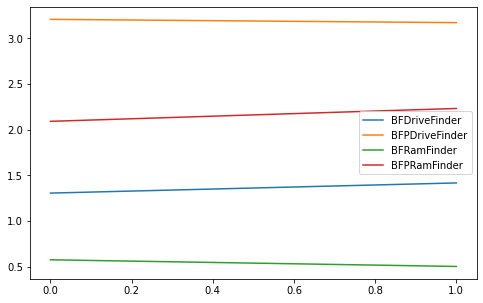

In [18]:
stat.as_plot(figsize=(8, 5))

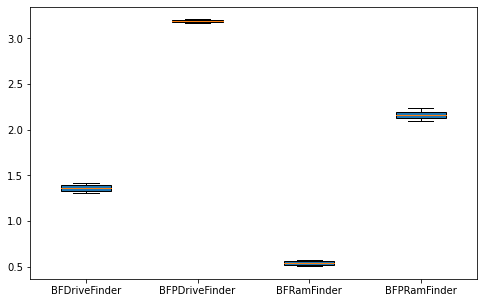

In [19]:
stat.as_boxplot(figsize=(8, 5))

# Corectness testing

In [20]:
from fp_utils.tests import FinderCorrectnessTester

In [21]:
correctness_tester = FinderCorrectnessTester(finders[0], finders[1:])

In [22]:
correctness_tester.test_random(df, 2)

array([ True,  True,  True])

In [23]:
correctness_tester.test_all(df.sample(2), verbose=True)

-----
Test #000
OK -- BFPDriveFinder
OK -- BFRamFinder
OK -- BFPRamFinder
-----
Test #001
OK -- BFPDriveFinder
OK -- BFRamFinder
OK -- BFPRamFinder
-----


array([ True,  True,  True])

In [27]:
wa_finder = BFRamFinder(df.sample(int(len(df) * 0.5)))

0.000s -- BFRamFinder init time


In [28]:
correctness_tester = FinderCorrectnessTester(bf_drive_finder, [bfp_drive_finder, wa_finder])

In [32]:
correctness_tester.test_random(df, 2, verbose=True)

-----
Test #000
OK -- BFPDriveFinder
WA -- BFRamFinder
-----
Test #001
OK -- BFPDriveFinder
OK -- BFRamFinder
-----


array([ True, False])

# Draw

In [33]:
from fp_utils.draw import MoleculeDrawer

In [34]:
fingerprint = pd.read_pickle("../data/f.pickle")
fingerprint.name = 'NCCc1ccc4c(c1)OCCO4'
fingerprint = fingerprint[df.columns]

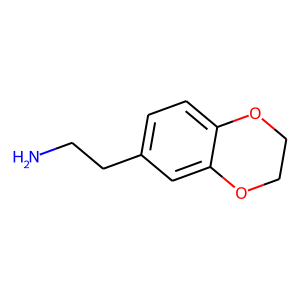

In [35]:
MoleculeDrawer.draw_one(fingerprint.name)

In [36]:
answers = list(bf_ram_finder.find(fingerprint, ans_count=10))

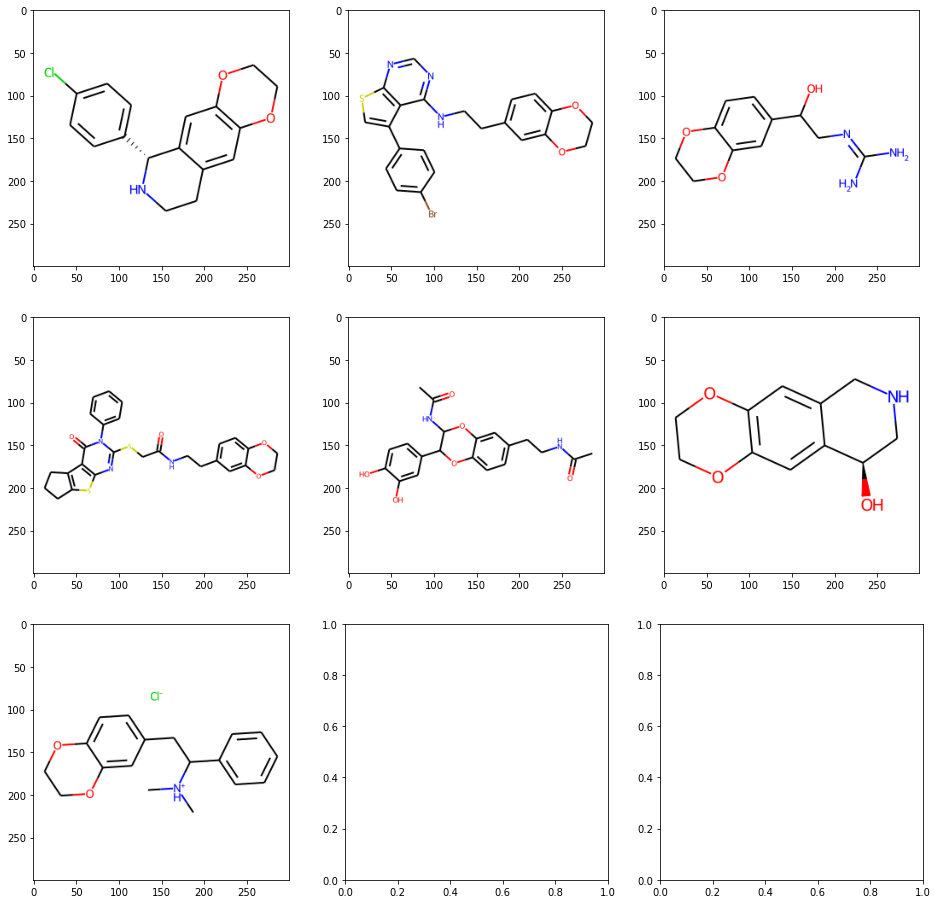

In [37]:
MoleculeDrawer.draw_many(answers)